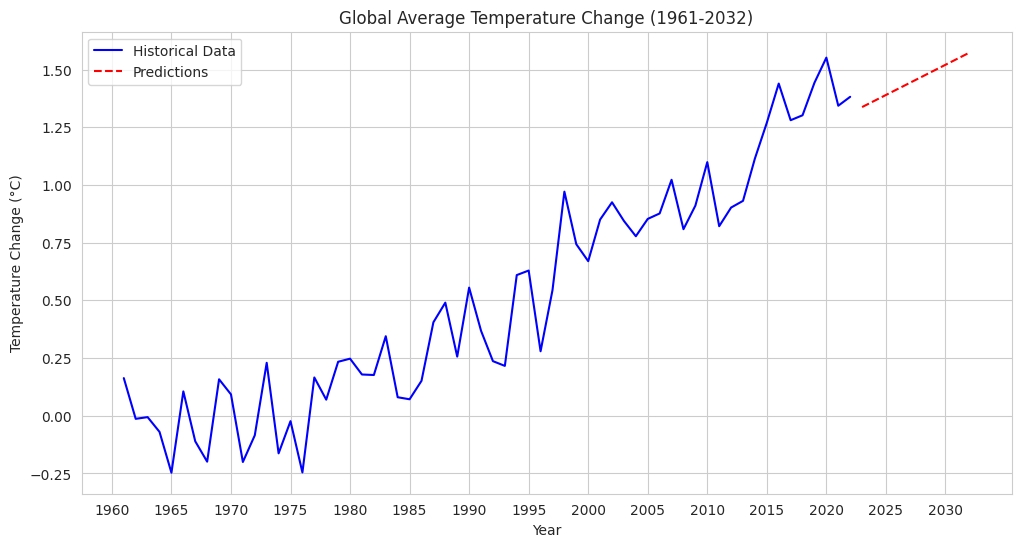

<ipython-input-2-bc5f6a47a97b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Temperature_Change', y='Country', data=top_affected_countries, palette='coolwarm')


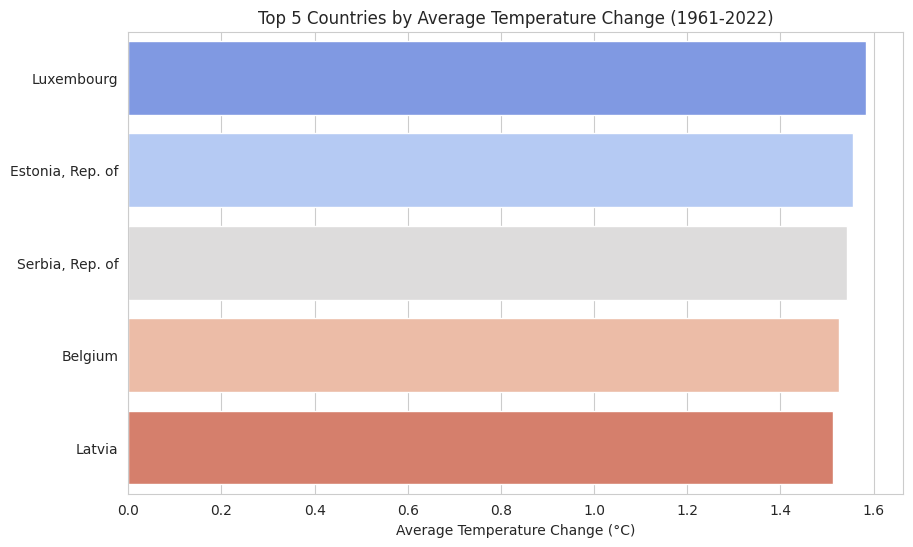

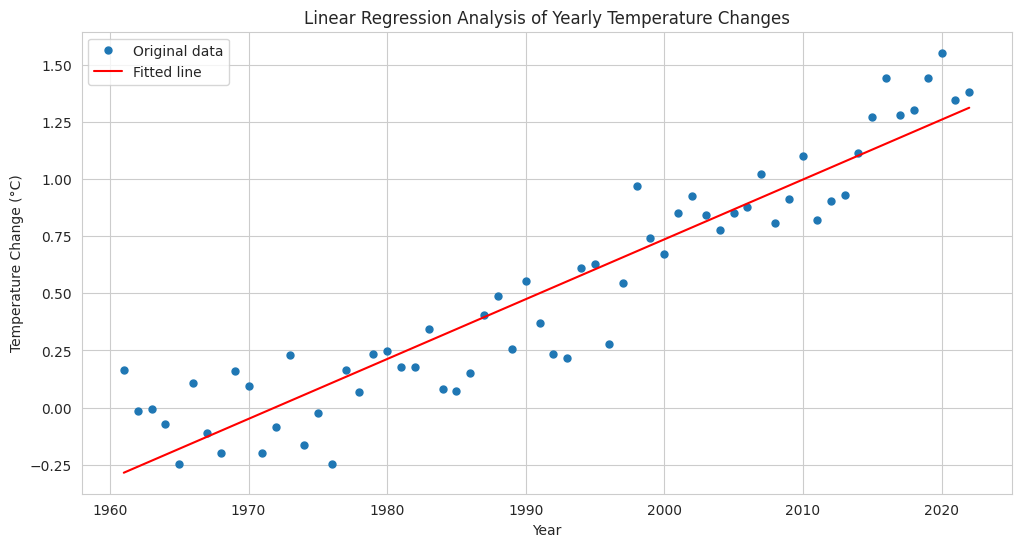

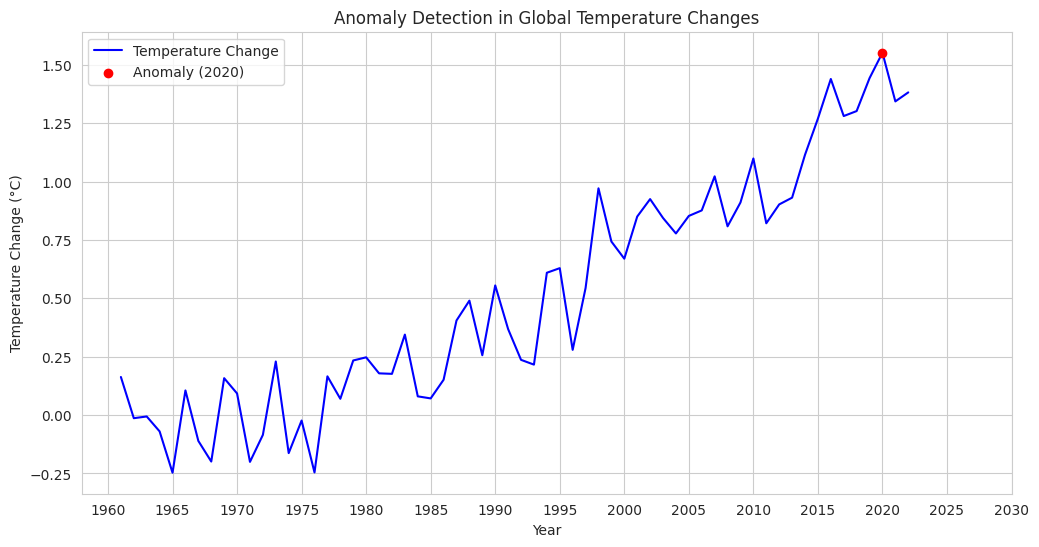

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


climate_data = pd.read_csv('/content/climate_change_indicators.csv')
climate_data['Average_Temperature_Change'] = climate_data.loc[:, 'F1961':'F2022'].mean(axis=1)

# Global Trend Analysis and Predictive Modelling
years = np.arange(1961, 2023)
yearly_avg_temp_changes = climate_data.loc[:, 'F1961':'F2022'].mean()
model = LinearRegression().fit(years.reshape(-1, 1), yearly_avg_temp_changes)
future_years = np.arange(2023, 2033)
predicted_temp_changes = model.predict(future_years.reshape(-1, 1))

# Geographical Analysis for Top Affected Countries
top_affected_countries = climate_data.nlargest(5, 'Average_Temperature_Change')[['Country', 'Average_Temperature_Change']]


sns.set_style("whitegrid")

# Visualization 1: Global Temperature Change Trend + Predictions
plt.figure(figsize=(12, 6))
plt.plot(years, yearly_avg_temp_changes, label='Historical Data', color='blue')
plt.plot(future_years, predicted_temp_changes, label='Predictions', linestyle='--', color='red')
plt.title('Global Average Temperature Change (1961-2032)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.xticks(np.arange(1960, 2035, 5))
plt.show()

# Visualization 2: Top 5 Countries by Average Temperature Change
plt.figure(figsize=(10, 6))
sns.barplot(x='Average_Temperature_Change', y='Country', data=top_affected_countries, palette='coolwarm')
plt.title('Top 5 Countries by Average Temperature Change (1961-2022)')
plt.xlabel('Average Temperature Change (°C)')
plt.ylabel('')
plt.show()

# Statistical and Correlation Analysis Visualization
slope, intercept, _, _, _ = linregress(years, yearly_avg_temp_changes)
line = slope * years + intercept
plt.figure(figsize=(12, 6))
plt.plot(years, yearly_avg_temp_changes, 'o', label='Original data', markersize=5)
plt.plot(years, line, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression Analysis of Yearly Temperature Changes')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.show()

# Anomaly Detection Visualization
# Highlighting the anomaly year (2020) on the global trend chart
plt.figure(figsize=(12, 6))
plt.plot(years, yearly_avg_temp_changes, label='Temperature Change', color='blue')
plt.scatter([2020], [yearly_avg_temp_changes[2020-1961]], color='red', label='Anomaly (2020)', zorder=5)
plt.title('Anomaly Detection in Global Temperature Changes')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.xticks(np.arange(1960, 2035, 5))
plt.show()

